In [61]:
import pandas as pd
import numpy as np
from scipy.stats import t

%matplotlib ipympl
import matplotlib.pyplot as plt
import math


## Step 1

In [9]:
df = pd.read_csv('invest.txt',sep = ' ', low_memory=False)
display(df)

year     gnp  invest     cpi  interest
0   1968   873.4   133.3   82.54      5.16
1   1969   944.0   149.3   86.79      5.87
2   1970   992.7   144.2   91.45      5.95
3   1971  1077.6   166.4   96.01      4.88
4   1972  1185.9   195.0  100.00      4.50
5   1973  1326.4   229.8  105.75      6.44
6   1974  1434.2   228.7  115.08      7.83
7   1975  1549.2   206.1  125.79      6.25
8   1976  1718.0   257.9  132.34      5.50
9   1977  1918.3   324.1  140.05      5.46
10  1978  2163.9   386.6  150.42      7.46
11  1979  2417.8   423.0  163.42     10.28
12  1980  2633.1   402.3  178.64     11.77
13  1981  2937.7   471.5  195.51     13.42
14  1982  3057.5   421.9  207.23     11.02

## Step 2

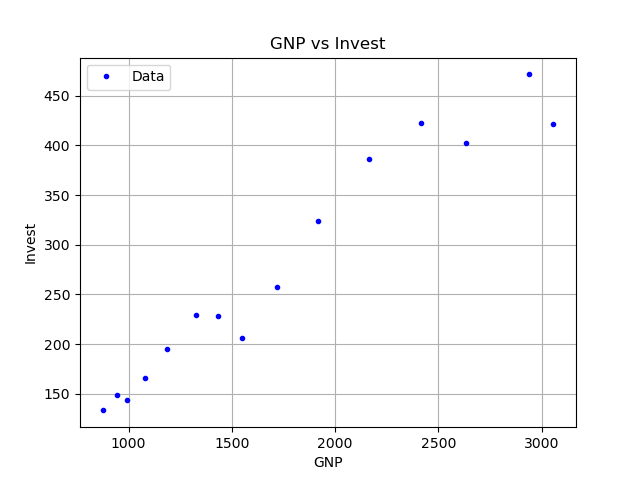

In [12]:
GNP_raw = pd.array(df['gnp'])
invest_raw = pd.array(df['invest'])

fig, ax = plt.subplots()
plt.plot(GNP_raw, invest_raw, '.', color="b")
plt.title('GNP vs Invest')
plt.xlabel("GNP")
plt.ylabel("Invest")
plt.legend([r"Data"])
plt.grid()
plt.show()

## Logarithmic transformation of data

In [19]:
X = np.log(GNP_raw)
Y = np.log(invest_raw)
X_mean = np.mean(X)
Y_mean = np.mean(Y)

## Step 3

In [79]:
numerator = 0
X_var = 0

for i in range(len(X)):
    numerator += (X[i] - X_mean )*(Y[i] - Y_mean)

for i in range(len(GNP)):
    X_var += (X[i] - X_mean)**2

# slope
beta1 = numerator/X_var
# intercept
beta0 = Y_mean - beta1*X_mean

# square sigma
sq_sigma = 0
for i in range (len(X)):
    sq_sigma += (Y[i]-(beta0+beta1*X[i]))**2 
sq_sigma = (1/(len(X)-2))*sq_sigma

# standard deviation slope
dev_beta1 = np.sqrt(sq_sigma/X_var)

# standard deviation intercept
dev_beta0 = np.sqrt(sq_sigma*((1/len(X))+(X_mean**2/X_var)))

# determination coefficient
Y_pred = beta0 + beta1*X
r2 = np.sum((Y_pred-Y_mean)**2)/np.sum((Y-Y_mean)**2)


In [53]:
print('beta0 = {:.4f}' .format(beta0), 'beta1 = {:.4f}' .format(beta1))
print("Standard deviation beta0 = {:.4f}" .format(dev_beta0), "Standard deviation beta1 = {:.4f}" .format(dev_beta1))
print("Determination coefficient R^2 = {:.4f}" .format(r2))

beta0 = -1.9636 beta1 = 1.0153
Standard deviation beta0 = 0.4095 Standard deviation beta1 = 0.0554
Determination coefficient R^2 = 0.9628


## Step 4

In [75]:
p = 1
alpha = 0.05
df = len(X) - (p + 1)
q = 1 - alpha/2
sup_int = t.ppf(q, df)
test_b1 = beta1/dev_beta1

#p-value

p_value = 2*(1-t.cdf(test_b1,df))

print("The t-Student test interval at level alpha = 0.05 is : [{:.4f},{:.4f}] " .format(-sup_int, sup_int))
print("The test statistic for the slope {:.4f}" .format(test_b1))
print("The p-value is : {:.4} " .format(p_value))

The t-Student test interval at level alpha = 0.05 is : [-2.1604,2.1604] 
The test statistic for the slope 18.3320
The p-value is : 1.136e-10 


As the test statistic doesn't belong to the interval, we reject the null Hipothesis (beta1 = 0).

As the p-value is less than alpha, then we reject the null Hipothesis.

## Step 5

In [ ]:
For the GNP value 1000, estimate the necessary Investment, provide confidence and prediction
intervals for the 90% level.

In [96]:
n = len(X)
alpha = 0.1
q= 1 - alpha/2
df= n - 2

def Confidence_Interval(x):
    y = beta0 + beta1*x
    interval = np.zeros(2)
    interval[0] = y - t.ppf(q, df)*np.sqrt(sq_sigma*(1/n + (x-X_mean)**2/X_var))
    interval[1] = y + t.ppf(q, df)*np.sqrt(sq_sigma*(1/n + (x-X_mean)**2/X_var))
    return interval

def Prediction_Interval(x):
    y = beta0 + beta1*x
    interval = np.zeros(2)
    interval[0] = y - t.ppf(q, df)*np.sqrt(sq_sigma*(1 + 1/n + (x-X_mean)**2/X_var))
    interval[1] = y + t.ppf(q, df)*np.sqrt(sq_sigma*(1 + 1/n + (x-X_mean)**2/X_var))
    return interval


x = np.log(1000)


conf_int = np.exp(Confidence_Interval(x))
pred_int = np.exp(Prediction_Interval(x))


pred_int_sup = y + t.ppf(q, df)*np.sqrt(sq_sigma*(1 + 1/n + (x-X_mean)**2/X_var))
pred_int_inf = y - t.ppf(q, df)*np.sqrt(sq_sigma*(1 + 1/n + (x-X_mean)**2/X_var))

print("Estimation of the necessary investment = {:.4f} " .format(np.exp(y)))
print("Confidence Interval = [{:.4f},{:.4f}]" .format(conf_int[0],conf_int[1]))
print("Prediction Interval = [{:.4f},{:.4f}]" .format(pred_int[0],pred_int[1]))

Estimation of the necessary investment = 155.9794 
Confidence Interval = [146.6755,165.8735]
Prediction Interval = [132.0024,184.3117]


## Step 6

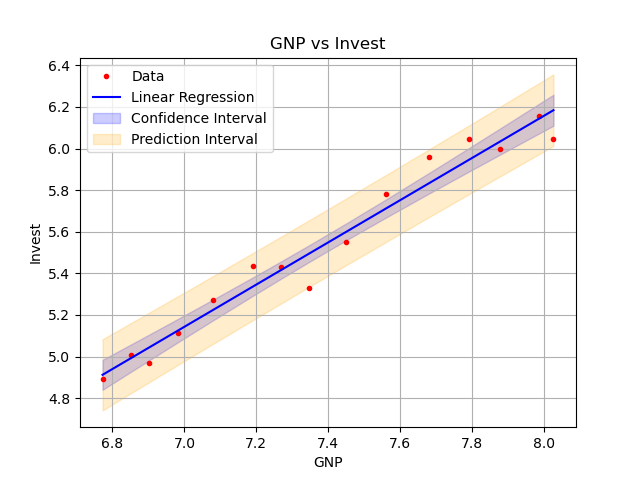

In [126]:
confidence_interval = []
prediction_interval = []

for i in range(len(X)):
    auxC = np.zeros(2)
    auxP = np.zeros(2)
    auxC = Confidence_Interval(X[i])
    auxP = Prediction_Interval(X[i])
    confidence_interval.append(auxC)
    prediction_interval.append(auxP)
    

confidence_interval = np.transpose(confidence_interval)
prediction_interval = np.transpose(prediction_interval)

fig, ax = plt.subplots()
plt.plot(X, Y, '.', color="r", label= "Data")
plt.plot(X, Y_pred, color="b", label= "Linear Regression")
plt.fill_between(X, confidence_interval[0], confidence_interval[1] , color='b', alpha=.2 ,label = "Confidence Interval")
plt.fill_between(X, prediction_interval[0], prediction_interval[1] , color='orange', alpha=.2, label = "Prediction Interval")
plt.title('GNP vs Invest')
plt.xlabel("GNP")
plt.ylabel("Invest")
ax.legend(loc="upper left")
plt.grid()
plt.show()